In [9]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append(r'C:\Users\fuqih\Documents\GitHub\DatabaseCodes_QF\Computer Codes\Targets')
import numpy as np
import matplotlib.pyplot as plt
from Utilities import OutputExcel, clear_sheet
import pandas as pd

In [14]:
sheetname = "SpecificHeat"
clear_sheet(sheetname)

finished


### "A.-A. Tavassoli, J.-W. Rensman, M. Schirra, K. Shiba, Materials design data for reduced activation martensitic steel type f82h, Fusion Engineering and Design 61 (2002) 617–628."

In [15]:
# Define the temperature range and the specific heat function
Temp = np.arange(300, 1201, 10).tolist()
def SpecificHeat(T):
    ans = 1390.2 - 7.8498 * T + 0.022969 * T**2 - 2.7446e-5 * T**3 + 1.1932e-8 * T**4
    return ans

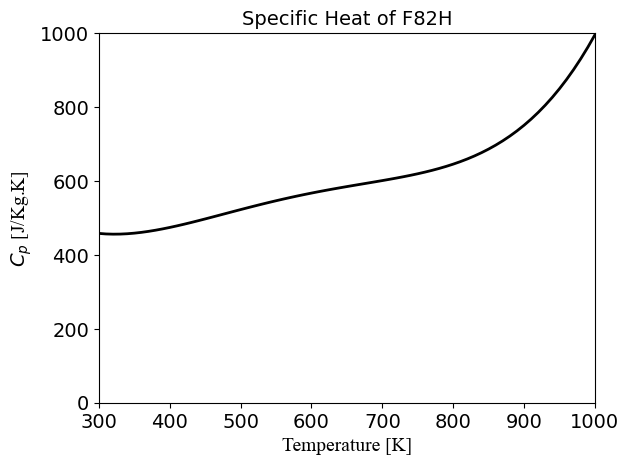

In [16]:
# Calculate specific heat for each temperature value
C_p = np.array([SpecificHeat(temp) for temp in Temp])

# Plot the data
fig = plt.figure('F82H specific heat')
plt.plot(Temp, C_p, 'k', linewidth=2)
plt.xlabel('Temperature [K]', fontsize=14, fontname='Times New Roman')
plt.ylabel(r'$C_p$ [J/Kg.K]', fontsize=14, fontname='Times New Roman')
plt.xlim([300, 1000])
plt.ylim([0, 1000])
plt.title('Specific Heat of F82H', fontsize=14)
ax = plt.gca()
ax.tick_params(labelsize=14)

plt.show()

In [17]:
inital_row = 1
title = "Specific Heat of F82H"
reference = ["A.-A. Tavassoli, J.-W. Rensman, M. Schirra, K. Shiba, Materials design data for reduced activation martensitic steel type f82h, Fusion Engineering and Design 61 (2002) 617–628."]

OutputExcel(sheetname, title, reference, inital_row, [], [fig])

finished


### "Eurofer MPH 2016"

In [18]:
temperature = [20, 50, 100, 200, 300, 400, 500, 600]
specific_heat = [439, 462, 490, 523, 546, 584, 660, 800]

df_specific_heat = pd.DataFrame({
    "Temperature (°C)": temperature,
    "Specific Heat (J/kg*K)": specific_heat
})

In [19]:
def fit_func(t):
    t_k = t + 273.15
    Cp = 2.6996*t_k-0.00496*t_k**2+3.335e-6*t_k**3
    return Cp

In [20]:
T = range(0, 601, 20)
Cp = np.array([fit_func(temp) for temp in T])

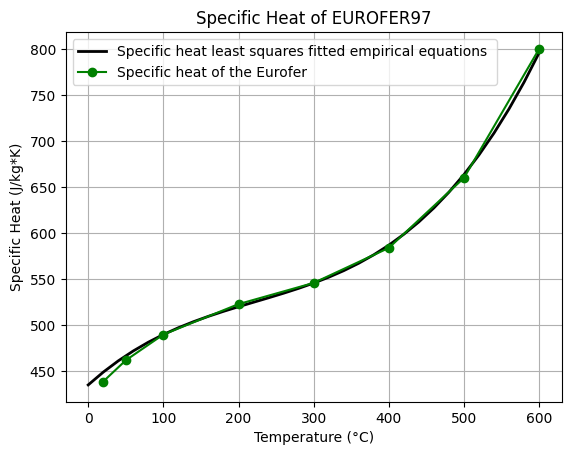

In [21]:
fig2 = plt.figure()
plt.plot(T, Cp, 'k', linewidth=2, label="Specific heat least squares fitted empirical equations ")
plt.plot(df_specific_heat["Temperature (°C)"], df_specific_heat["Specific Heat (J/kg*K)"], marker='o', linestyle='-', color='g', label = "Specific heat of the Eurofer")
plt.title('Specific Heat of EUROFER97')
plt.xlabel('Temperature (°C)')
plt.ylabel('Specific Heat (J/kg*K)')
plt.grid(True)
plt.legend()
plt.show()

In [22]:
inital_row = 30
title = "Specific Heat of Eurofer"
reference = [
    "1. ASTM E-1142 Standard Terminology Relating to Thermophysical Properties",
    "2. F. Tavassoli: 'Comparison of 316L(N) -IG and Eurofer for Early DEMO'. EFDA-WP13-MAT-02-01",
    "3. K. Mergia, N. Boukos: 'Structural, thermal, electrical and magnetic properties of Eurofer97 steel', J. Nucl. Mater. 373 (2008) 1-8"
]

OutputExcel(sheetname, title, reference, inital_row, [df_specific_heat], [fig2])

finished


### "F. Tavassoli, DEMO Interim structural design criteria. Ref. N, T.-DMN/DIR 2002."

In [23]:
data = {
    'EUROFER97 Temp (K)': [296.1038961, 322.7272727, 348.0519481, 373.3766234, 398.0519481, 423.3766234, 447.4025974, 472.7272727, 498.0519481, 522.7272727, 548.0519481, 572.7272727, 598.0519481, 622.7272727, 648.0519481, 672.7272727, 698.0519481, 722.7272727, 747.4025974, 773.3766234, 797.4025974, 822.7272727, 847.4025974, 872.7272727],
    'EUROFER97 Specific Heat (J/kg-K)': [448.3953787, 461.4890886, 475.3503167, 485.3658537, 496.1489031, 504.6213094, 513.8639281, 521.5661104, 530.0831509, 536.9709475, 544.6726573, 556.954618, 565.4685494, 573.1703717, 583.9537869, 597.0474968, 611.6841631, 625.6264442, 655.5840284, 687.1630295, 701.0526316, 721.0526316, 764.1848524, 801.1553273],
    'F82H Temp (K)': [292.8571429, 322.7272727, 373.3766234, 422.7272727, 472.7272727, 522.7272727, 572.7272727, 622.7272727, 673.3766234, 722.7272727, 772.7272727, 822.7272727, 872.7272727, 922.7272727, 972.7272727, 1022.727273, 1032.467532],
    'F82H Specific Heat (J/kg-K)': [449.1655969, 461.4890886, 479.2041078, 495.1498089, 519.039709, 559.2682927, 546.2130937, 567.0089858, 589.3453145, 614.4980739, 646.3414634, 692.5250321, 783.4033613, 860.0506468, 804.2362003, 1076.123253, 1156.225931]
}

In [24]:
df = pd.DataFrame.from_dict(data, orient='index').transpose()

In [25]:
degree = 3
coeffs_eurofer97 = np.polyfit(data['EUROFER97 Temp (K)'], data['EUROFER97 Specific Heat (J/kg-K)'], degree)
poly_eurofer97 = np.poly1d(coeffs_eurofer97)
coeffs_f82h = np.polyfit(data['F82H Temp (K)'], data['F82H Specific Heat (J/kg-K)'], degree)
poly_f82h = np.poly1d(coeffs_f82h)

In [26]:
temp_eurofer97 = np.linspace(min(data['EUROFER97 Temp (K)']), max(data['EUROFER97 Temp (K)']), 500)
temp_f82h = np.linspace(min(data['F82H Temp (K)']), max(data['F82H Temp (K)']), 500)

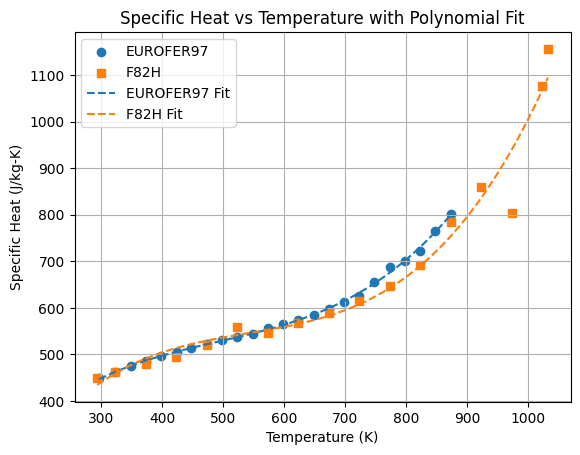

In [27]:
fig3 = plt.figure()

plt.scatter(data['EUROFER97 Temp (K)'], data['EUROFER97 Specific Heat (J/kg-K)'], label='EUROFER97', marker='o')
plt.scatter(data['F82H Temp (K)'], data['F82H Specific Heat (J/kg-K)'], label='F82H', marker='s')
plt.plot(temp_eurofer97, poly_eurofer97(temp_eurofer97), label='EUROFER97 Fit', linestyle='--')
plt.plot(temp_f82h, poly_f82h(temp_f82h), label='F82H Fit', linestyle='--')

plt.xlabel('Temperature (K)')
plt.ylabel('Specific Heat (J/kg-K)')
plt.title('Specific Heat vs Temperature with Polynomial Fit')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
inital_row = 72
title = "Specific Heat of Eurofer and F82H"
reference = [
    "F. Tavassoli, DEMO Interim structural design criteria. Ref. N, T.-DMN/DIR 2002.",
    "Specific heat of Eurofer 97 (Circles) as a function of temperature. The data for F82H (Triangles) are according to Ref. [14]. The continuous and dotted lines are the least squares fitted equations (6) and (7). Insert: Magnetic specific heat for Eurofer 97 (for details see text)."
]

OutputExcel(sheetname, title, reference, inital_row, [df], [fig3])

finished


### "Progress in development of China Low Activation Martensitic steel for fusion application"

In [29]:
data = {
    "Temperature (°C)": [25, 100, 200, 300, 400, 500, 600],
    "Specific heat (J/(kg K))": [431, 483, 521, 573, 626, 693, 795]
}
df = pd.DataFrame(data)

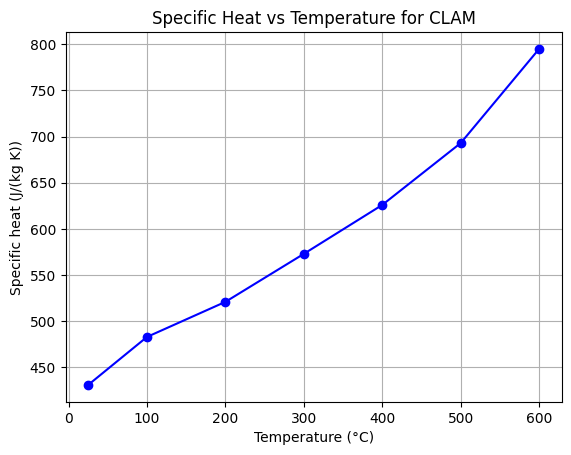

In [30]:
fig4 = plt.figure()
plt.plot(df["Temperature (°C)"], df["Specific heat (J/(kg K))"], marker='o', linestyle='-', color='b')
plt.title('Specific Heat vs Temperature for CLAM')
plt.xlabel('Temperature (°C)')
plt.ylabel('Specific heat (J/(kg K))')
plt.grid(True)
plt.show()

In [31]:
inital_row = 129
title = "Specific Heat of CLAM (Chinese low activation martensitic steel)"
reference = [
    "Progress in development of China Low Activation Martensitic steel for fusion application Q. Huang",
    "Q. Huang, Research on China Low Activation Martensitic Steel for Fusion Application, PhD thesis, Chinese Academy of Sciences (in Chinese), 2006"
]

OutputExcel(sheetname, title, reference, inital_row, [df], [fig4])

finished


### "Research and development on the China low activation martensitic steel (CLAM) Jinnan Yu"

In [37]:
data = {
    "Temperature (°C)": [100, 300, 500],
    "Thermal capacity (J/g °C)": [0.48, 0.52, 0.55],
}
df = pd.DataFrame(data)

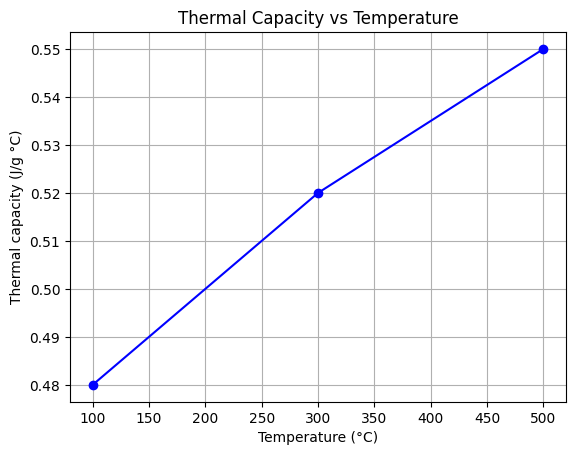

In [38]:
fig5 = plt.figure()

plt.plot(df["Temperature (°C)"], df["Thermal capacity (J/g °C)"], marker='o', linestyle='-', color='b')
plt.title('Thermal Capacity vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Thermal capacity (J/g °C)')
plt.grid(True)
plt.show()

In [39]:
inital_row = 169
title = "Specific Heat of CLAM (Chinese low activation martensitic steel) 2"
reference = [
    "Research and development on the China low activation martensitic steel (CLAM) Jinnan Yu ",
]

OutputExcel(sheetname, title, reference, inital_row, [df], [fig5])

finished
